# 0. Functions and libraries

In [251]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier

In [252]:
# Confusion matrix display
def confusion_matrix_dis(confusionMatrix):
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = ['1','2','3','5','6','7'])
    cm_display.plot()
    plt.show()

# Display all metrics
def metrics_values(actual,predicted):
    Accuracy = metrics.accuracy_score(actual,predicted)
    Precision = metrics.precision_score(actual,predicted, average = None)
    #Sensitivity = metrics.recall_score(actual,predicted, pos_label = 'M')
    #Specificity = metrics.recall_score(actual,predicted,pos_label = 'B')
    #F_score = metrics.f1_score(actual,predicted, pos_label = 'M')
    #print("Accuracy:", round(Accuracy,3), "\nPrecision:", round(Precision,3),"\nSensitivity:", 
          #round(Sensitivity,3),"\nSpecificity:", round(Specificity,3),"\nF1_score:", round(F_score,3))
    print("Accuracy:", round(Accuracy,3))
    print("Precision score by class:", Precision)

# 1. Data import

In [253]:
# Read in data file
file_name = 'glass.data'
glass = pd.read_csv(file_name, delimiter=',', 
                    header=None, names=['ID', 'RI', 'NA2O','MGO','AL2O3','SIO2','K2O','CAO',
                                       'BAO','FE2O3','TYPE'])

# Display contents
glass.head()

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [254]:
# View data structure
# 214 instances, 11 features
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   NA2O    214 non-null    float64
 3   MGO     214 non-null    float64
 4   AL2O3   214 non-null    float64
 5   SIO2    214 non-null    float64
 6   K2O     214 non-null    float64
 7   CAO     214 non-null    float64
 8   BAO     214 non-null    float64
 9   FE2O3   214 non-null    float64
 10  TYPE    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [255]:
# Remove ID feature
glass.drop('ID', axis = 1, inplace = True)
glass.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [256]:
# Count number of instances for each class
glass.TYPE.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: TYPE, dtype: int64

In [257]:
# Show as percentage
(glass.TYPE.value_counts()/glass.TYPE.count()).sort_index()

1    0.327103
2    0.355140
3    0.079439
5    0.060748
6    0.042056
7    0.135514
Name: TYPE, dtype: float64

In [258]:
# Check data type
glass.TYPE.dtype

dtype('int64')

In [259]:
# Recode as categorical
glass['TYPE'] = glass['TYPE'].astype('category')

In [260]:
# Confirm recode
glass.TYPE.dtype

CategoricalDtype(categories=[1, 2, 3, 5, 6, 7], ordered=False)

In [261]:
# Recheck structure
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   NA2O    214 non-null    float64 
 2   MGO     214 non-null    float64 
 3   AL2O3   214 non-null    float64 
 4   SIO2    214 non-null    float64 
 5   K2O     214 non-null    float64 
 6   CAO     214 non-null    float64 
 7   BAO     214 non-null    float64 
 8   FE2O3   214 non-null    float64 
 9   TYPE    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [262]:
# Summary of numerical features
glass.describe()
glass.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 2. Data normalization

In [263]:
# Normalize data
glass_n = pd.DataFrame(preprocessing.minmax_scale(glass.iloc[:,:9]), columns=glass.columns[:9])

glass_n.head()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [264]:
# Verify normalization
glass_n.describe()

,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Train a model on the data

In [265]:
# Sample size of 80%
train_N = int(np.floor(glass.shape[0] * .8))

In [266]:
# Training set
glass_train_n = glass.sample(n=train_N)

# Get indices of the randomly selected rows
random_indices = glass_train_n.index

# Create a data frame excluding the randomly selected rows (test set)
glass_test_n  = glass.drop(random_indices)

glass_train_n.info()
glass_test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 192 to 70
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      171 non-null    float64 
 1   NA2O    171 non-null    float64 
 2   MGO     171 non-null    float64 
 3   AL2O3   171 non-null    float64 
 4   SIO2    171 non-null    float64 
 5   K2O     171 non-null    float64 
 6   CAO     171 non-null    float64 
 7   BAO     171 non-null    float64 
 8   FE2O3   171 non-null    float64 
 9   TYPE    171 non-null    category
dtypes: category(1), float64(9)
memory usage: 13.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      43 non-null     float64 
 1   NA2O    43 non-null     float64 
 2   MGO     43 non-null     float64 
 3   AL2O3   43 non-null     float64 
 4   SIO2    43 non-null     float64 
 5   K2O     4

In [267]:
# Training and test set labels
glass_train_labels = glass_train_n.iloc[:, -1]
glass_test_labels = glass_test_n.iloc[:, -1]

In [268]:
# Set KNN alg, start with k = 13 sqrt(instances)
k = int(np.floor(np.sqrt(train_N)))
knn = KNeighborsClassifier(n_neighbors=k)

In [269]:
# Train model
knn.fit(glass_train_n, glass_train_labels)

KNeighborsClassifier(n_neighbors=13)

In [270]:
# Predict test set
glass_test_pred = knn.predict(glass_test_n)

#### 4. Model evaluation

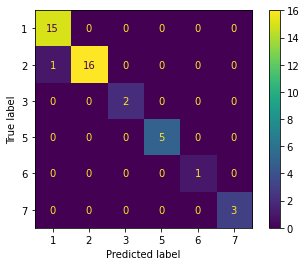

Accuracy: 0.977
Precision score by class: [0.9375 1.     1.     1.     1.     1.    ]


In [271]:
confusion_matrix = metrics.confusion_matrix(glass_test_labels, glass_test_pred)
confusion_matrix_dis(confusion_matrix)
metrics_values(glass_test_labels, glass_test_pred)

# 5. Improve performance

In [272]:
## Try different k values and check accuracy/precision

k =  1


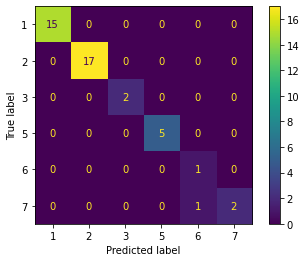

Accuracy: 0.977
Precision score by class: [1.  1.  1.  1.  0.5 1. ]
**************************************************
k =  5


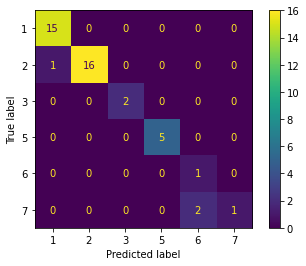

Accuracy: 0.93
Precision score by class: [0.9375     1.         1.         1.         0.33333333 1.        ]
**************************************************
k =  11


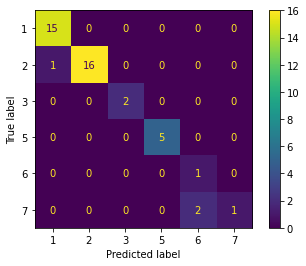

Accuracy: 0.93
Precision score by class: [0.9375     1.         1.         1.         0.33333333 1.        ]
**************************************************
k =  15


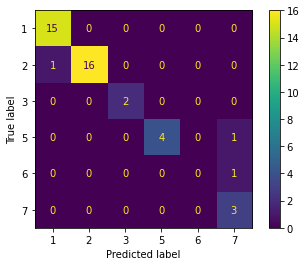

Accuracy: 0.93
Precision score by class: [0.9375 1.     1.     1.     0.     0.6   ]
**************************************************
k =  21


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


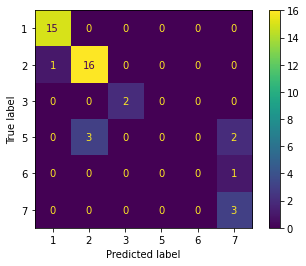

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.837
Precision score by class: [0.9375     0.84210526 1.         0.         0.         0.5       ]
**************************************************
k =  27


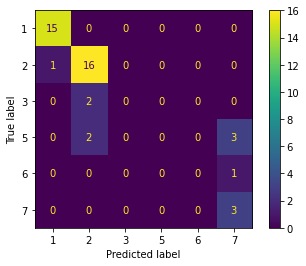

Accuracy: 0.791
Precision score by class: [0.9375     0.8        0.         0.         0.         0.42857143]
**************************************************


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
# Set of k's to train/test
kList = [1, 5, 11, 15, 21, 27]

# Loop through all k's and display confusion matrix and metrics
for k in kList:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(glass_train_n, glass_train_labels)
    glass_test_pred = knn.predict(glass_test_n)
    print("k = ", k)
    confusion_matrix = metrics.confusion_matrix(glass_test_labels, glass_test_pred)
    confusion_matrix_dis(confusion_matrix)
    metrics_values(glass_test_labels, glass_test_pred)
    print("**************************************************")